# STOCK PREDICTION using ML

## STOCK DATA API

In [ ]:
# alphavantage
api_key = '1ROHSUHYVQ1KF08D'

import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=1ROHSUHYVQ1KF08D'
r = requests.get(url)
data = r.json()

print(data)


{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-05-16 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2024-05-16 19:55:00': {'1. open': '168.9000', '2. high': '168.9400', '3. low': '168.8100', '4. close': '168.9400', '5. volume': '56'}, '2024-05-16 19:45:00': {'1. open': '168.9390', '2. high': '168.9390', '3. low': '168.8100', '4. close': '168.8100', '5. volume': '33'}, '2024-05-16 19:40:00': {'1. open': '168.9400', '2. high': '168.9400', '3. low': '168.9000', '4. close': '168.9400', '5. volume': '81'}, '2024-05-16 19:35:00': {'1. open': '168.8100', '2. high': '168.8100', '3. low': '168.8100', '4. close': '168.8100', '5. volume': '72'}, '2024-05-16 19:30:00': {'1. open': '168.8000', '2. high': '168.8700', '3. low': '168.8000', '4. close': '168.8100', '5. volume': '60'}, '2024-05-16 19:20:00': {'1. open': '168.9400', '2. high':

api_key = '1ROHSUHYVQ1KF08D'

https://www.alphavantage.co/documentation/#intraday

Mar - https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=1ROHSUHYVQ1KF08D&datatype=csv&month=2024-03&outputsize=full

Apr - https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=1ROHSUHYVQ1KF08D&datatype=csv&month=2024-04&outputsize=full


May - https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=1ROHSUHYVQ1KF08D&datatype=csv&month=2024-05&outputsize=full

## PREDICTION USING STATS

### MODEL TRAINING


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the historical data from the CSV file
data = pd.read_csv("IBM_APR_month_5mins_intraday.csv")

# Parse 'timestamp' column as datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Define features and target
X = data[['open', 'high', 'low', 'volume']]
y = data['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

### Model Predictions

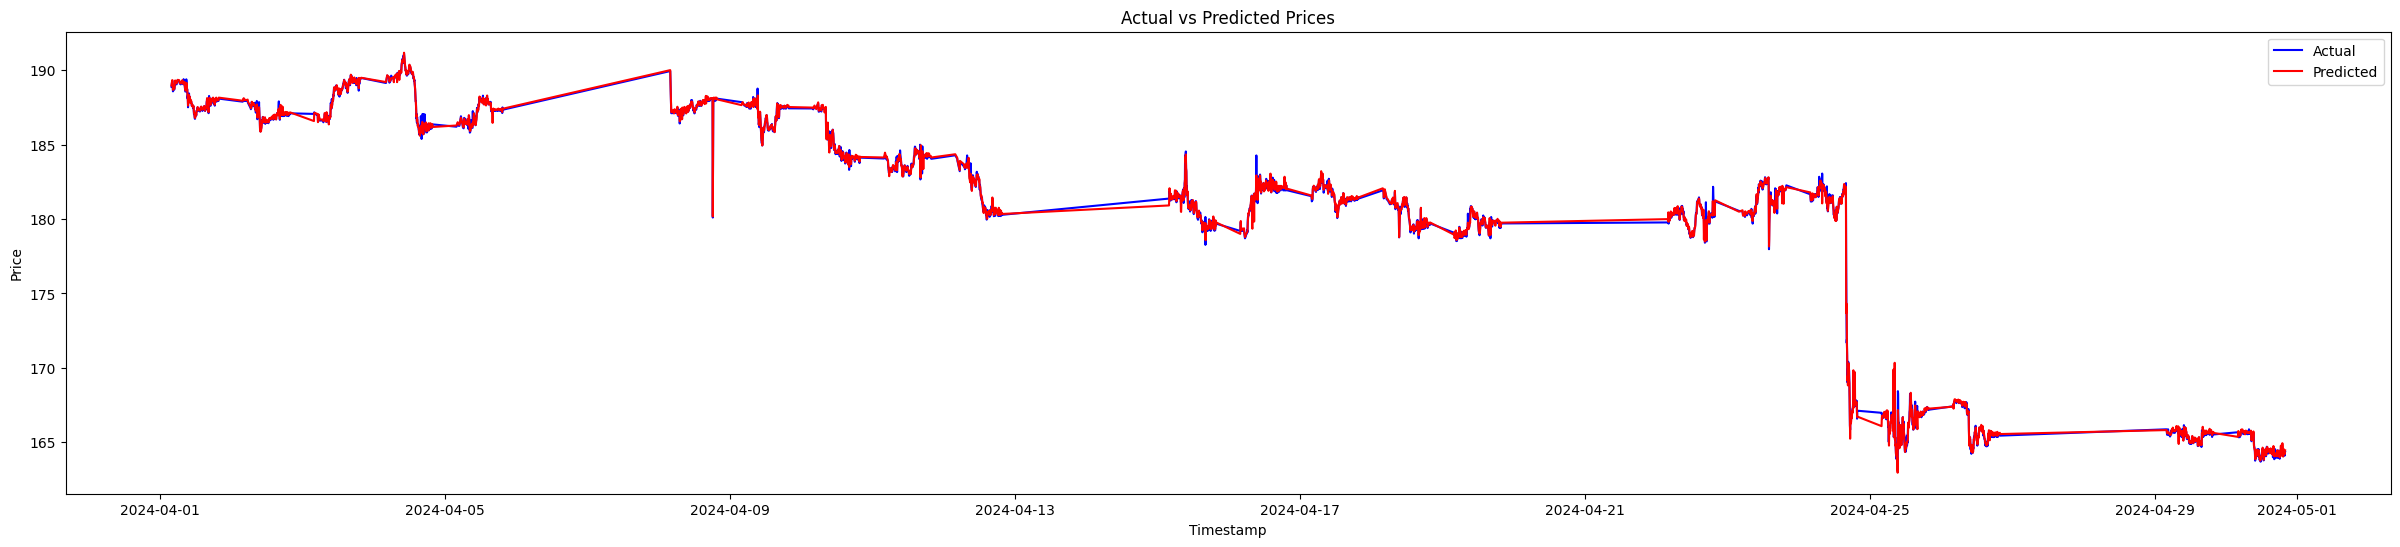

In [ ]:
# Predict the next price for the entire dataset
predictions = model.predict(X)

# Plot actual vs predicted prices
plt.figure(figsize=(30, 6))
plt.plot(data['timestamp'], data['close'], label='Actual', color='blue')
plt.plot(data['timestamp'], predictions, label='Predicted', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


### PREDICTION ON IBM MAY DATA

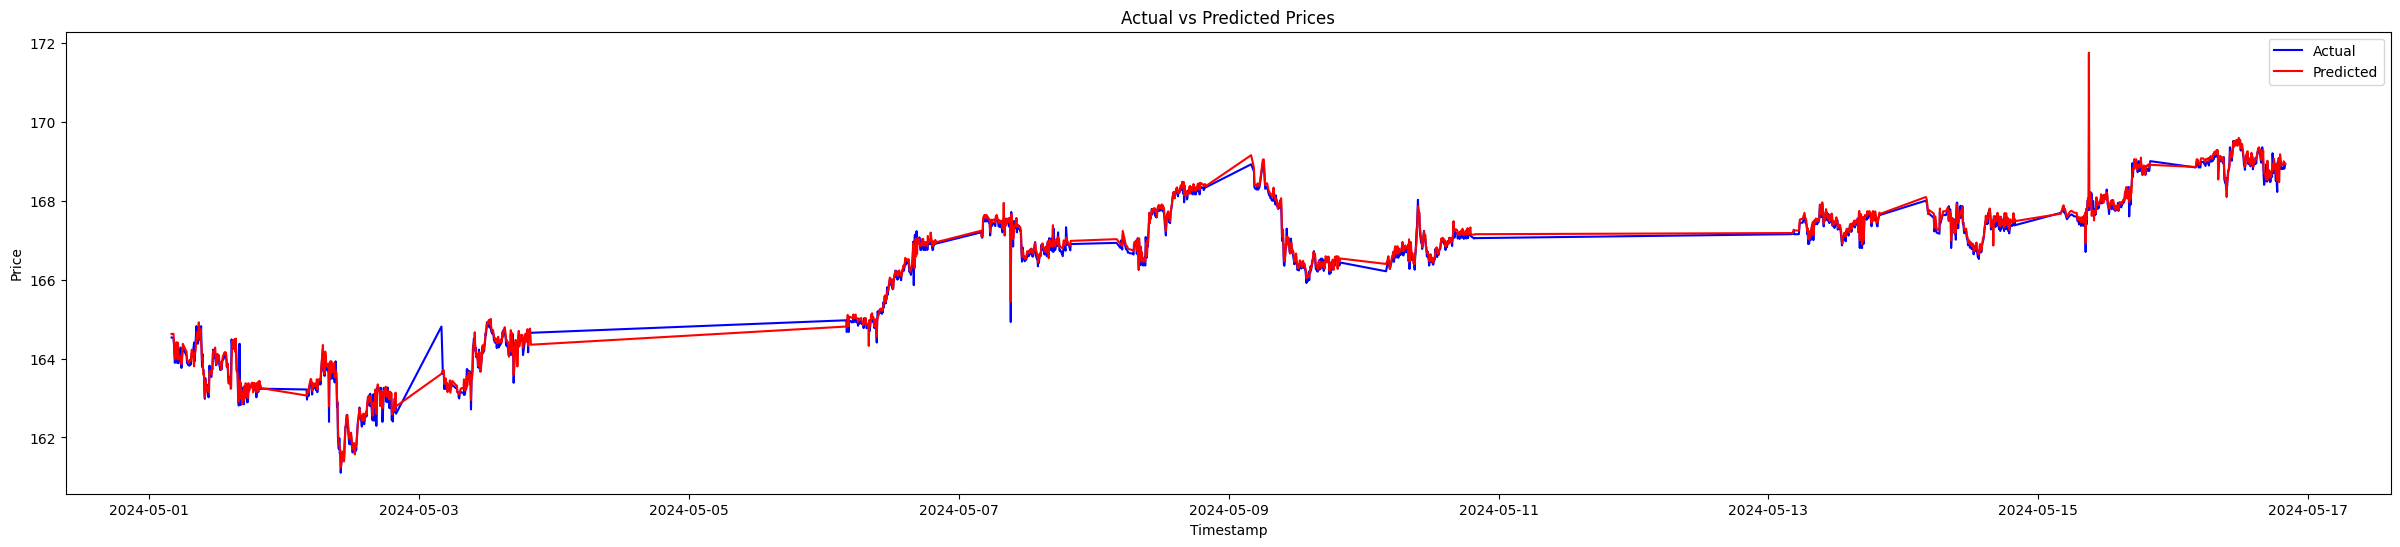

In [ ]:
data = pd.read_csv("IBM_MAY_month_5mins_intraday.csv")

# Parse 'timestamp' column as datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Define features and target
X = data[['open', 'high', 'low', 'volume']]
y = data['close']

predictions = model.predict(X)

# Plot actual vs predicted prices
plt.figure(figsize=(30, 6))
plt.plot(data['timestamp'], data['close'], label='Actual', color='blue')
plt.plot(data['timestamp'], predictions, label='Predicted', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


### PREDICTION ON IBM MAR DATA

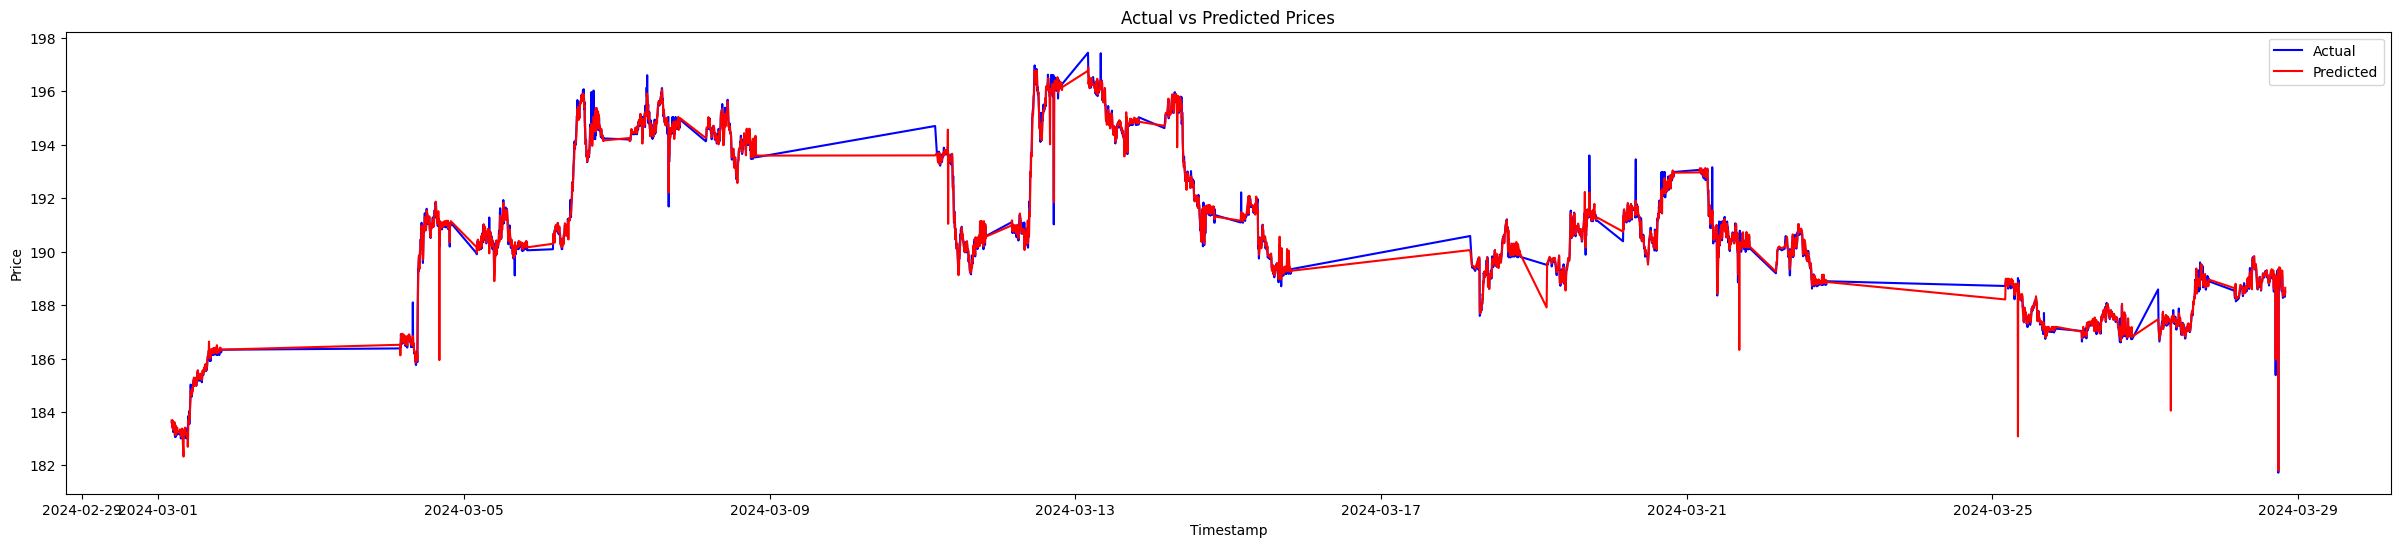

In [ ]:
data = pd.read_csv("IBM_MAR_month_5mins_intraday.csv")

# Parse 'timestamp' column as datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Define features and target
X = data[['open', 'high', 'low', 'volume']]
y = data['close']

predictions = model.predict(X)

# Plot actual vs predicted prices
plt.figure(figsize=(30, 6))
plt.plot(data['timestamp'], data['close'], label='Actual', color='blue')
plt.plot(data['timestamp'], predictions, label='Predicted', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


### PREDICTION JUST FOR LAST 100 Data Points for March

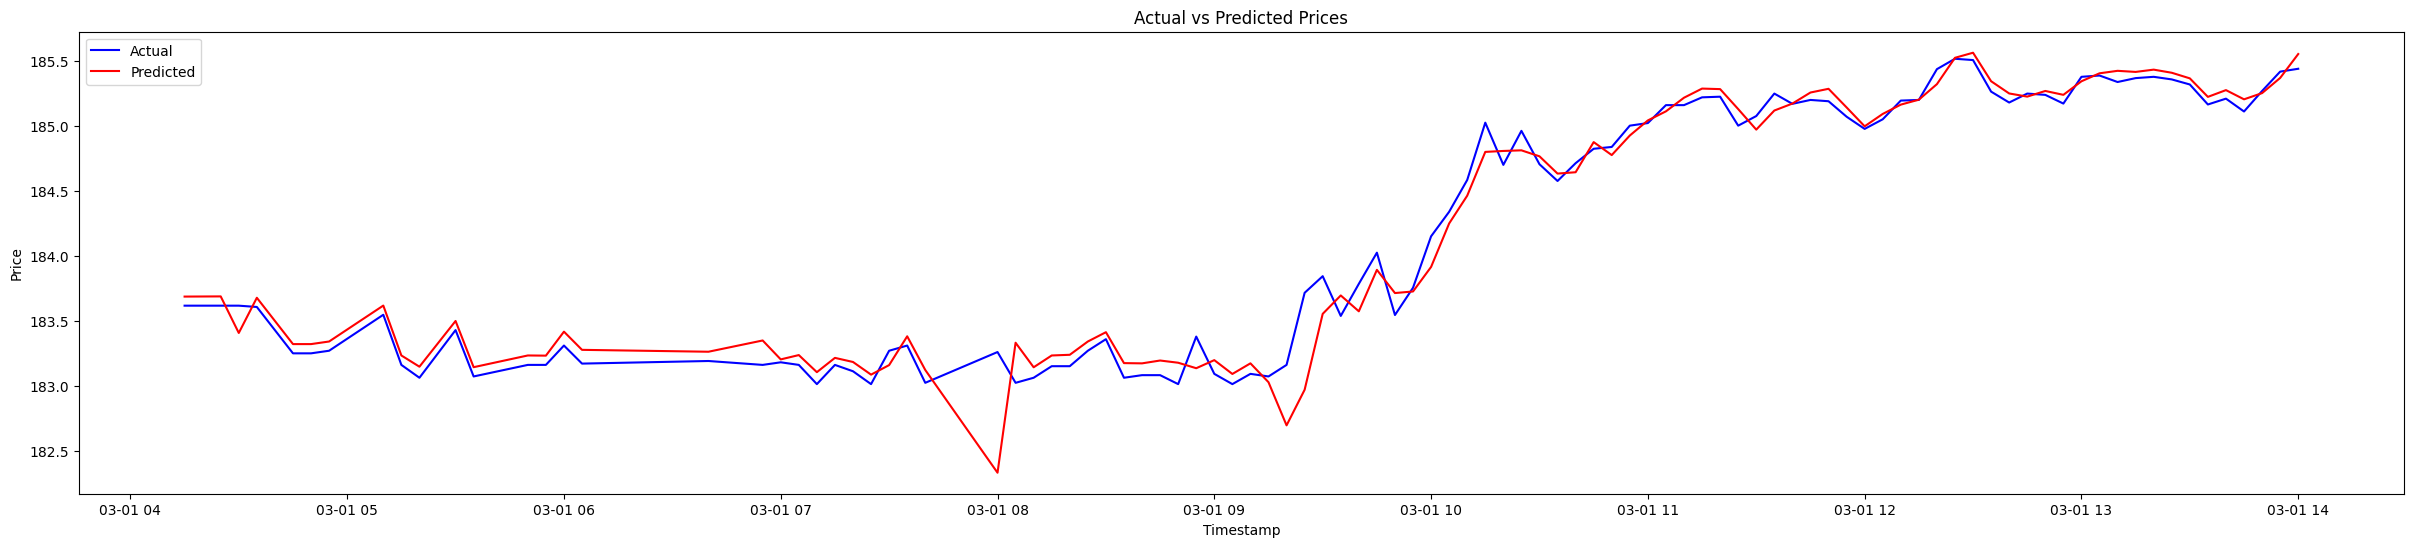

In [ ]:
data = pd.read_csv("IBM_MAR_month_5mins_intraday.csv")

# Parse 'timestamp' column as datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

data = data.tail(100)
# Define features and target
X = data[['open', 'high', 'low', 'volume']]
y = data['close']

predictions = model.predict(X)

# Plot actual vs predicted prices
plt.figure(figsize=(30, 6))
plt.plot(data['timestamp'], data['close'], label='Actual', color='blue')
plt.plot(data['timestamp'], predictions, label='Predicted', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


### MODEL TRANING AND PREDICTION USING LAST 10 DATA POINTS

window_size = 10

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

window_size = 10

# Load the data
data = pd.read_csv("IBM_APR_month_5mins_intraday.csv")

# Parse timestamp as datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Sort data by timestamp
data = data.sort_values(by='timestamp')

# Function to create features and target variable
def create_features_and_target(data, window_size=10):
    X = []
    y = []
    d = data[['open', 'high', 'low', 'volume']]
    for i in range(len(data) - window_size):
        X.append(d.iloc[i:i+window_size].values.flatten())
        y.append(data.iloc[i+window_size]['close'])
    return X, y

# Create features and target
X, y = create_features_and_target(data, window_size)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
predictions = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

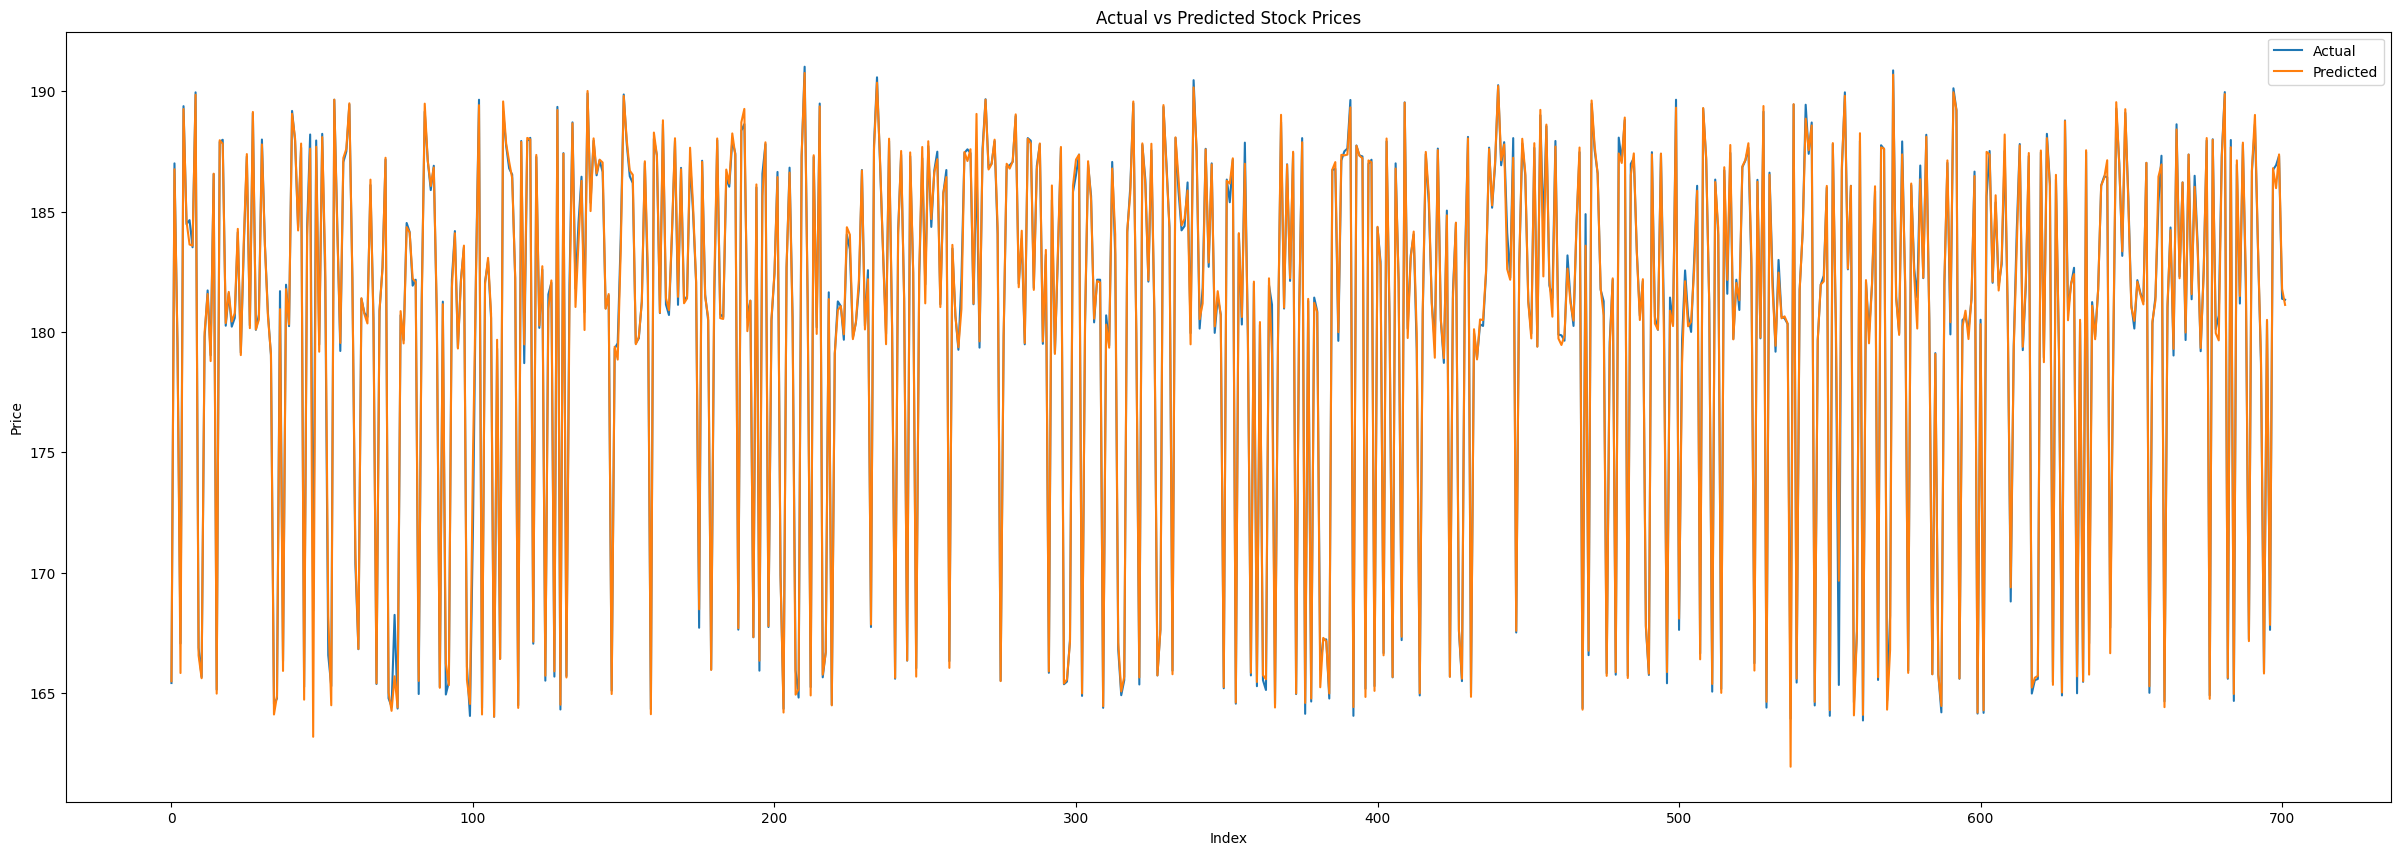

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(30, 10))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()

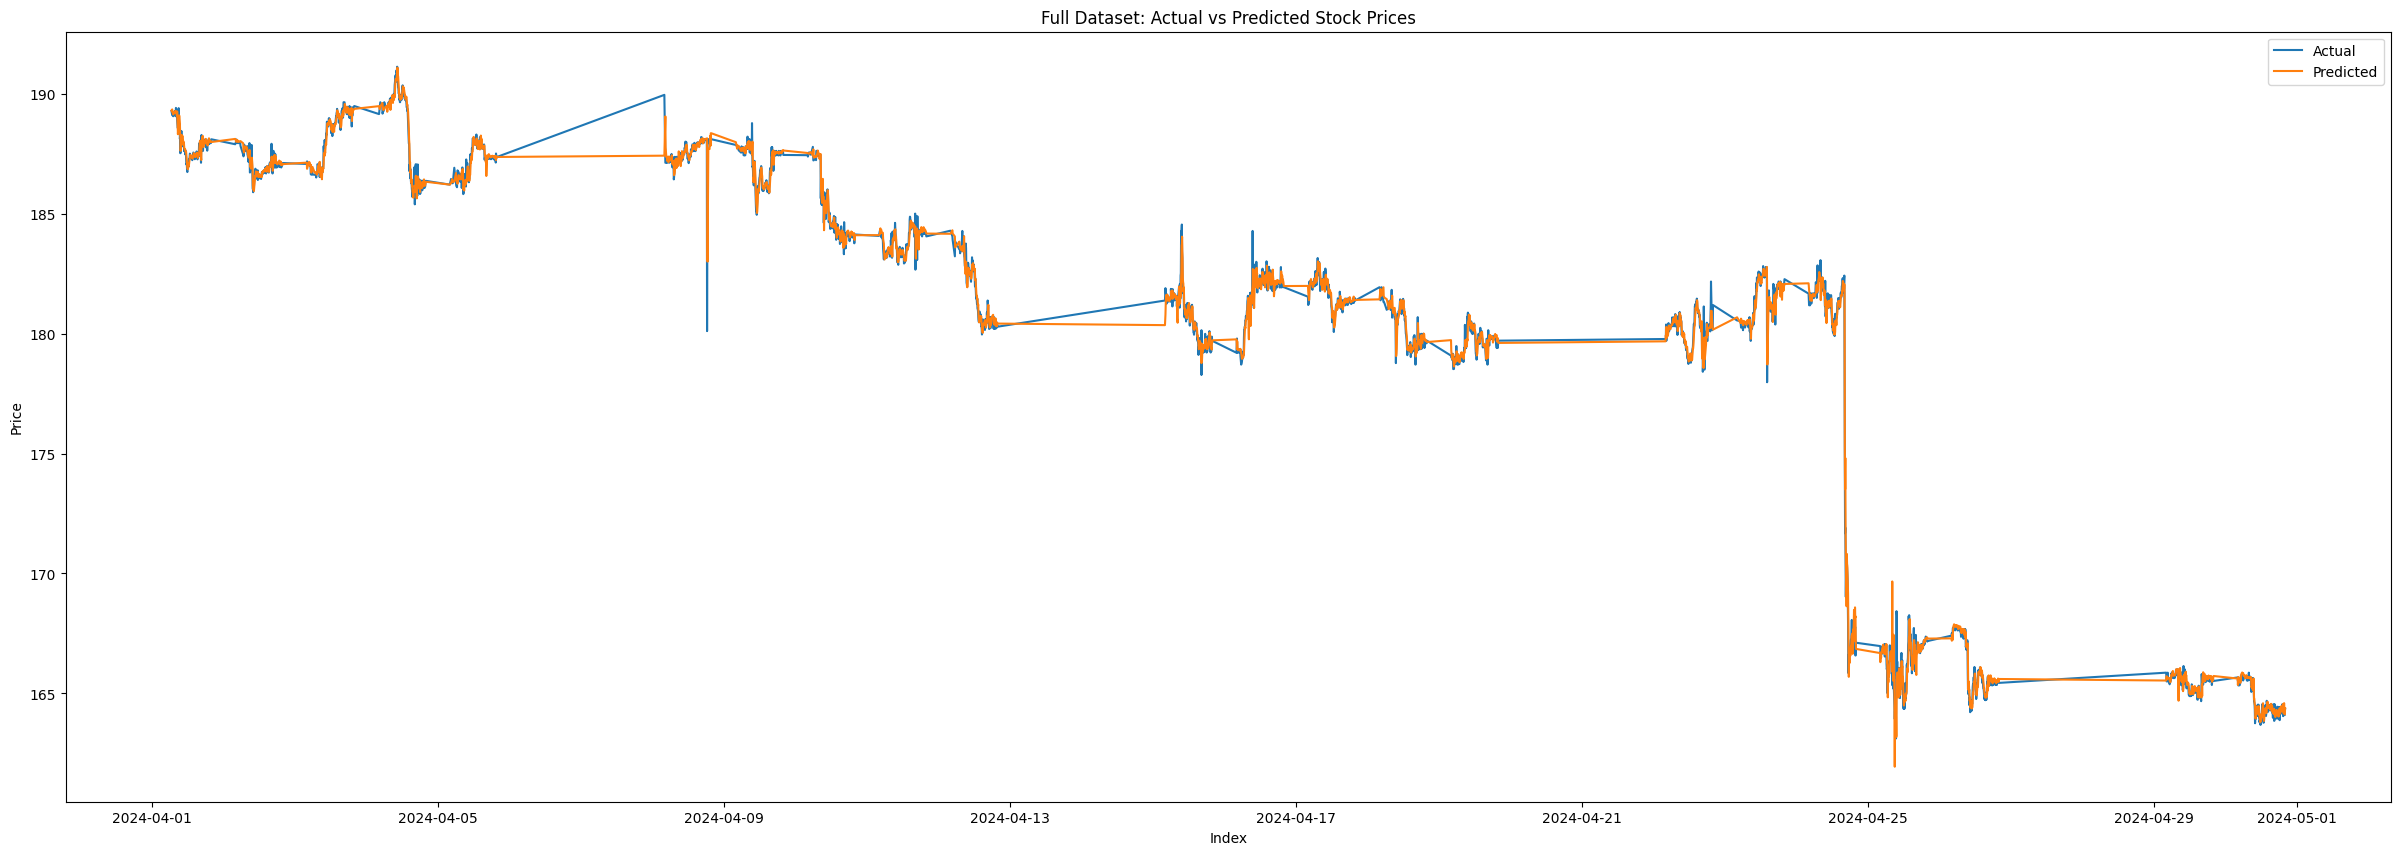

In [ ]:
full_predictions = model.predict(X)

series_to_flatten = data[window_size:]['close']
flat_list = series_to_flatten.tolist()


# Plot all predictions against actual values
plt.figure(figsize=(30, 10))
plt.plot(data[window_size:]['timestamp'], flat_list, label='Actual')
plt.plot(data[window_size:]['timestamp'], full_predictions, label='Predicted')


plt.title("Full Dataset: Actual vs Predicted Stock Prices")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()

### PREDICTION ON MARCH DATA

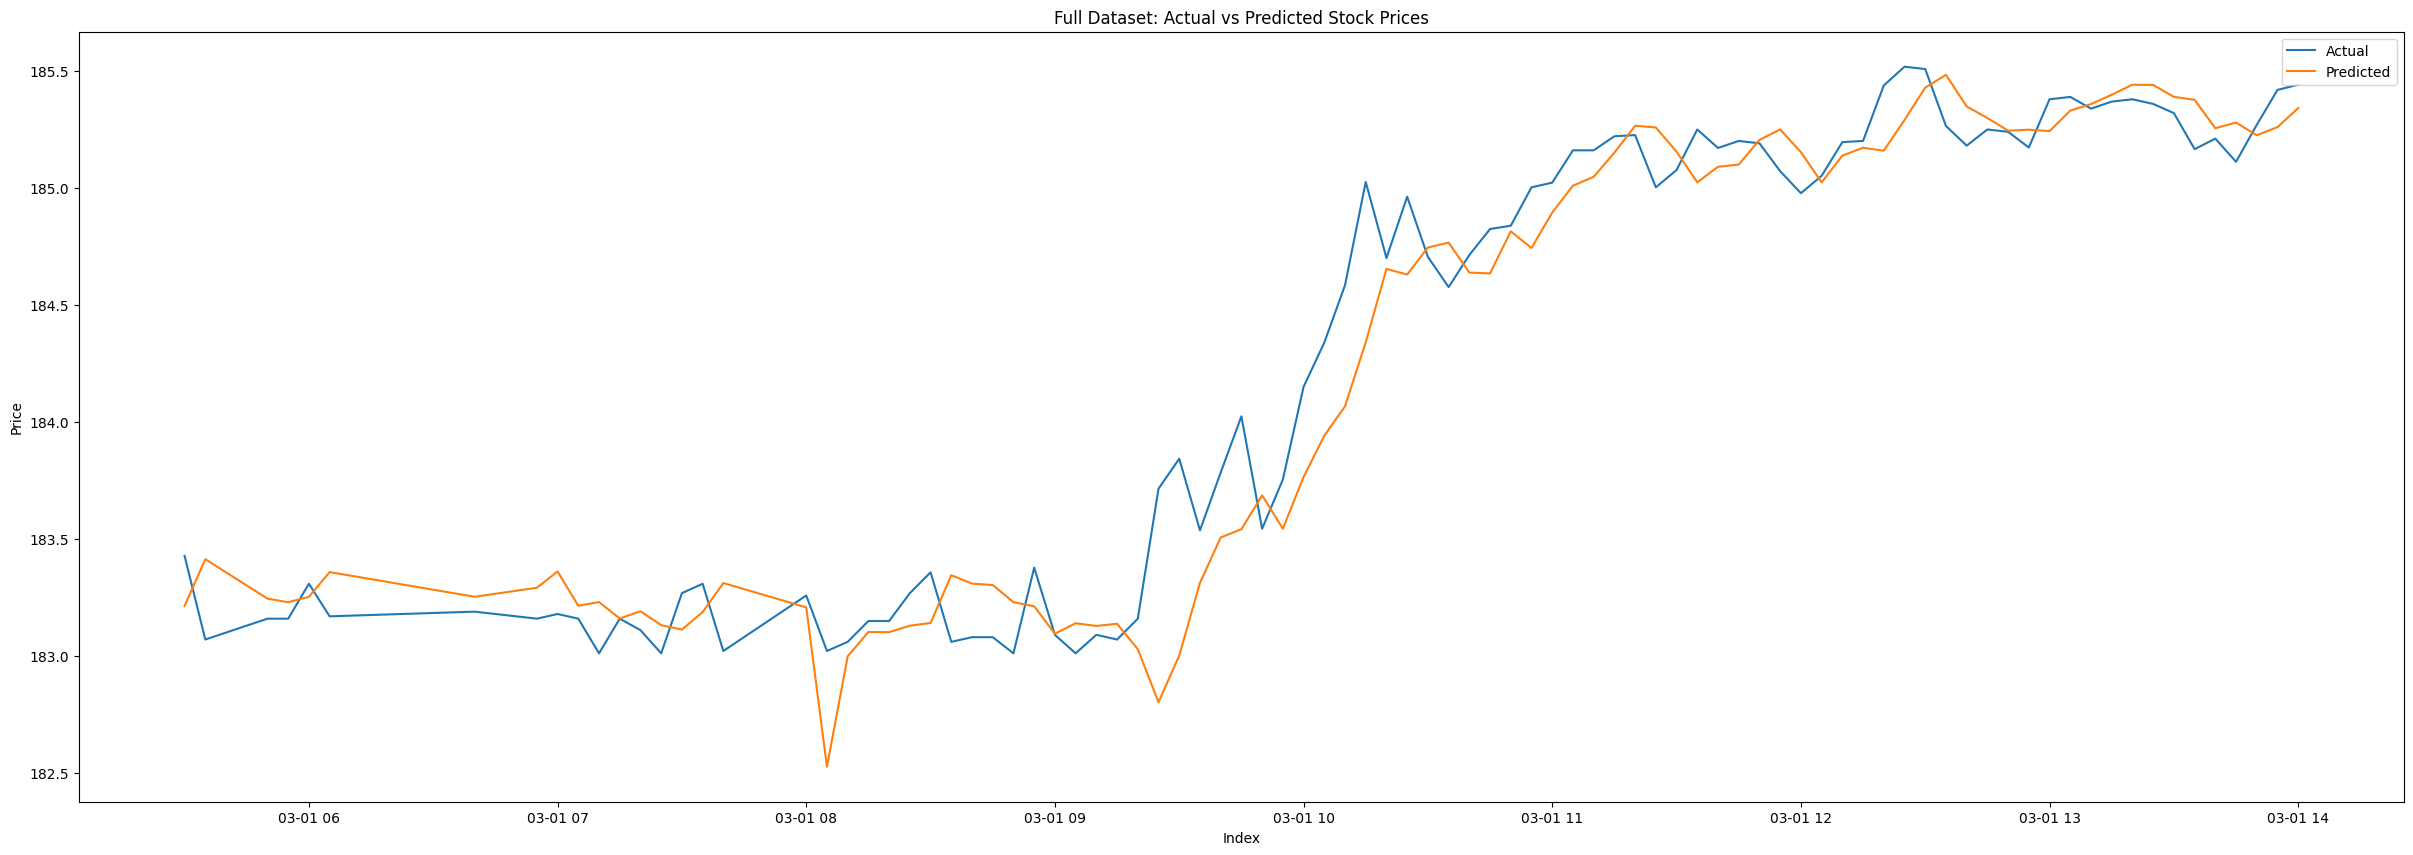

In [ ]:
data = pd.read_csv("IBM_MAR_month_5mins_intraday.csv")
data = data.tail(100)

# Parse timestamp as datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])
# Sort data by timestamp
data = data.sort_values(by='timestamp')
X, y = create_features_and_target(data)
predictions = model.predict(X)

series_to_flatten = data[window_size:]['close']
flat_list = series_to_flatten.tolist()

# Plot all predictions against actual values
plt.figure(figsize=(30, 10))
plt.plot(data[window_size:]['timestamp'], flat_list, label='Actual')
plt.plot(data[window_size:]['timestamp'], predictions, label='Predicted')
plt.title("Full Dataset: Actual vs Predicted Stock Prices")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()

## PREDICTION USING LSTM BASED APPROACH


### TRAINING AND TESTING

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
data = pd.read_csv('IBM_APR_month_5mins_intraday.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Preprocessing
scaler = MinMaxScaler()
data[['open', 'high', 'low', 'volume']] = scaler.fit_transform(data[['open', 'high', 'low', 'volume']])
data['close'] = scaler.fit_transform(data[['close']])

# Define a function to create the input-output sequence
def create_sequence(data_x, data_y, window_size):
    X, y = [], []
    for i in range(len(data_x) - window_size):
        X.append(data_x[i:(i + window_size)].values)
        y.append(data_y.iloc[i + window_size]['close'])
    return np.array(X), np.array(y)

# Define window size
window_size = 100

# Create sequences
X, y = create_sequence(data[['open', 'high', 'low', 'volume']], data[['close']], window_size)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [46]:
len(data)

3518

In [43]:
len(y_train)

2798

In [44]:
len(y_test)

700

In [45]:
len(train_preds)

2798

Epoch 1/50
86/86 [==============================] - 4s 17ms/step - loss: 0.0056 - val_loss: 9.4307e-04
Epoch 2/50
86/86 [==============================] - 1s 7ms/step - loss: 4.0503e-04 - val_loss: 2.0036e-04
Epoch 3/50
86/86 [==============================] - 1s 7ms/step - loss: 3.5775e-04 - val_loss: 2.3118e-04
Epoch 4/50
86/86 [==============================] - 1s 7ms/step - loss: 3.4047e-04 - val_loss: 1.2329e-04
Epoch 5/50
86/86 [==============================] - 1s 10ms/step - loss: 3.1876e-04 - val_loss: 1.1807e-04
Epoch 6/50
86/86 [==============================] - 1s 12ms/step - loss: 3.0913e-04 - val_loss: 1.1978e-04
Epoch 7/50
86/86 [==============================] - 1s 7ms/step - loss: 2.9913e-04 - val_loss: 1.1387e-04
Epoch 8/50
86/86 [==============================] - 1s 8ms/step - loss: 2.9888e-04 - val_loss: 1.0271e-04
Epoch 9/50
86/86 [==============================] - 1s 7ms/step - loss: 2.9740e-04 - val_loss: 8.9730e-05
Epoch 10/50
86/86 [============================

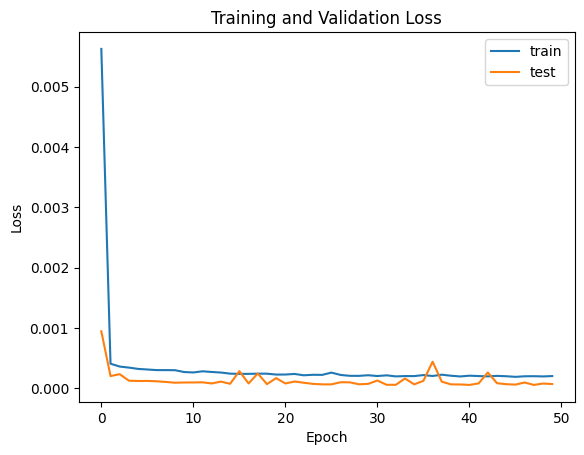

In [49]:
# Build the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

# Plot loss during training
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


86/86 [==============================] - 1s 4ms/step


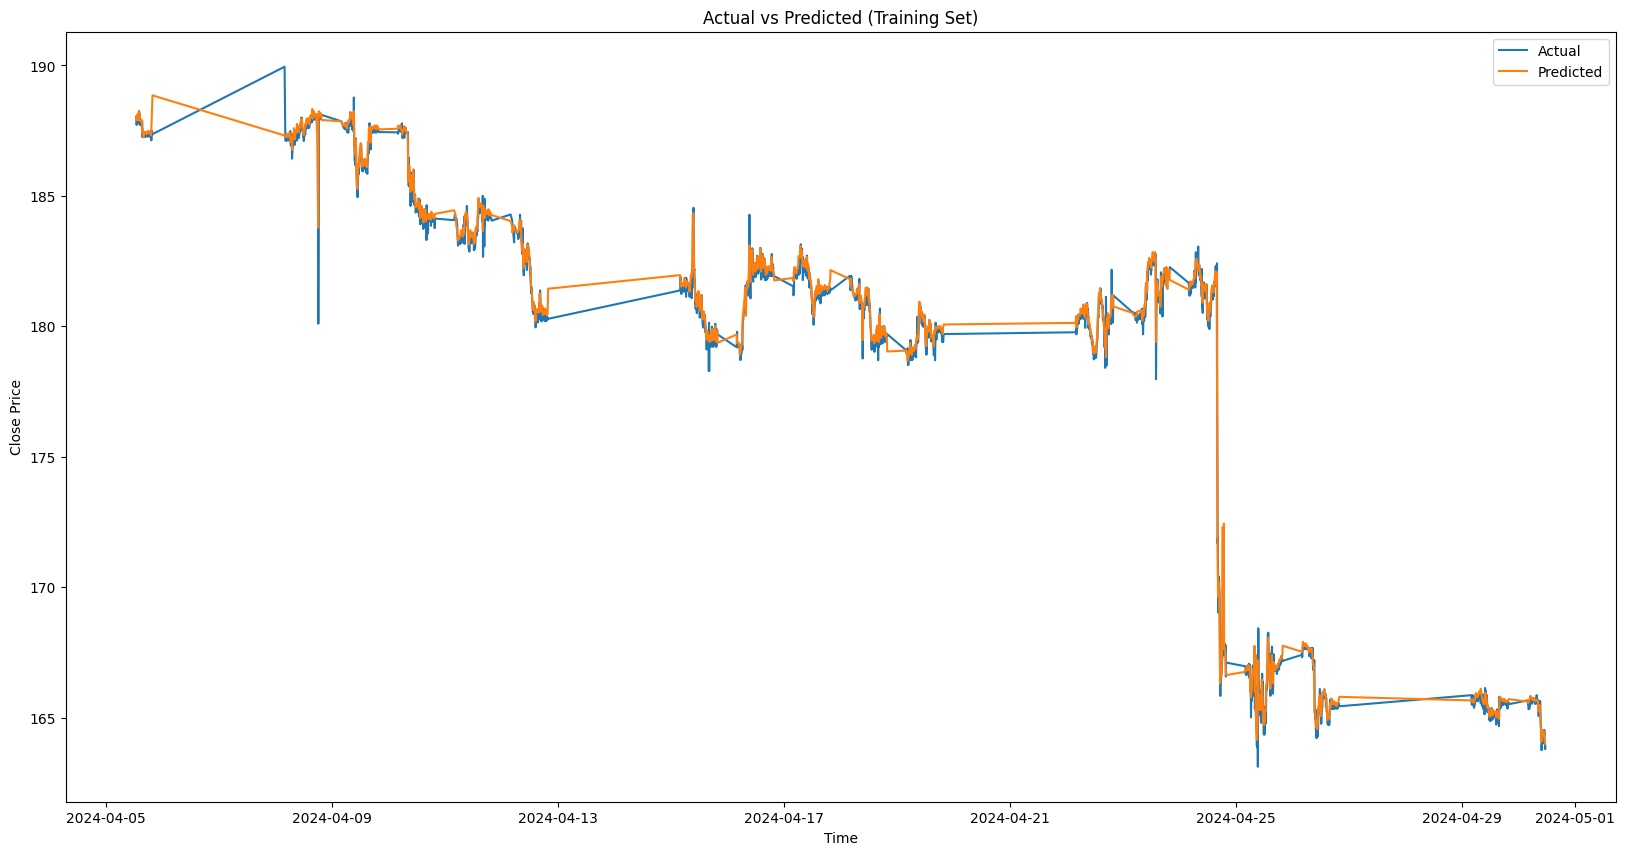

22/22 [==============================] - 0s 5ms/step


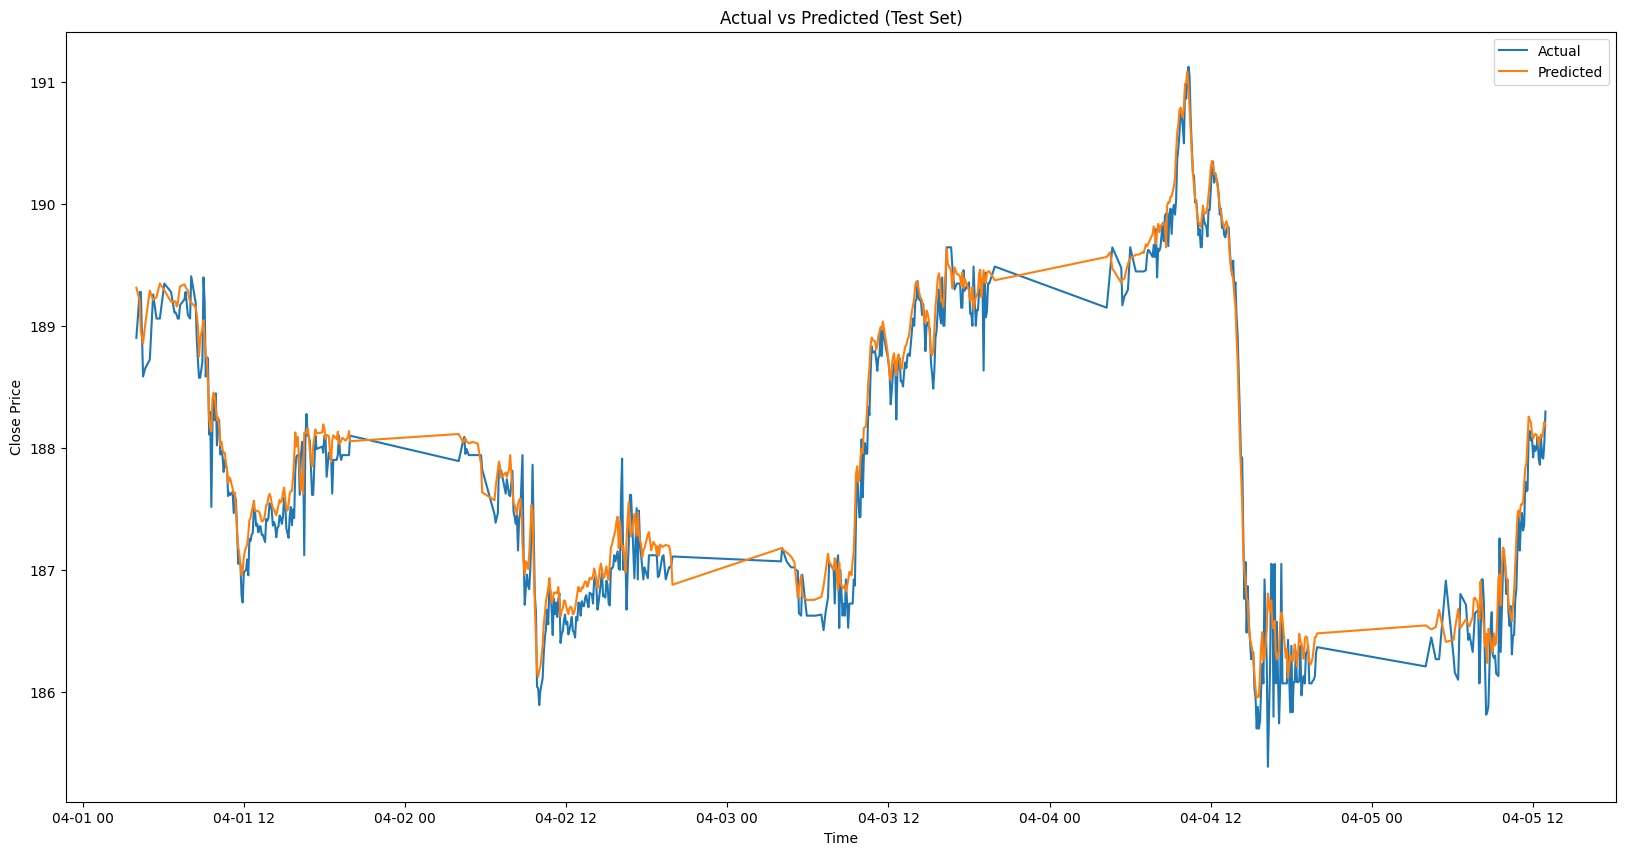

In [50]:
# Plot actual vs predicted for training set
train_preds = model.predict(X_train)
train_preds = scaler.inverse_transform(np.concatenate((X_train[:, -1, :-1], train_preds.reshape(-1, 1)), axis=1))[:, -1]
y_train_orig = scaler.inverse_transform(np.concatenate((X_train[:, -1, :-1], y_train.reshape(-1, 1)), axis=1))[:, -1]

plt.figure(figsize=(20, 10))
plt.plot(data['timestamp'][window_size:train_size+window_size], y_train_orig, label='Actual')
plt.plot(data['timestamp'][window_size:train_size+window_size], train_preds, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted (Training Set)')
plt.legend()
plt.show()


# Plot actual vs predicted for test set
test_preds = model.predict(X_test)
test_preds = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], test_preds.reshape(-1, 1)), axis=1))[:, -1]
y_test_orig = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]

plt.figure(figsize=(20, 10))
plt.plot(data['timestamp'][train_size+window_size:], y_test_orig, label='Actual')
plt.plot(data['timestamp'][train_size+window_size:], test_preds, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted (Test Set)')
plt.legend()
plt.show()


### PREDICTION ON NEW DATA BUT SAME MODEL

In [ ]:
# Function to predict on new data
new_data = pd.read_csv('IBM_MAR_month_5mins_intraday.csv')
new_data['timestamp'] = pd.to_datetime(new_data['timestamp'])

scaler = MinMaxScaler()
new_data[['open', 'high', 'low', 'volume']] = scaler.fit_transform(new_data[['open', 'high', 'low', 'volume']])
new_data['close'] = scaler.fit_transform(new_data[['close']])

# Create sequences
X_new, y_new = create_sequence(new_data[['open', 'high', 'low', 'volume']], new_data[['close']], window_size)

# Predictions
preds = model.predict(X_new)

# Inverse scaling
preds = scaler.inverse_transform(np.concatenate((X_new[:, -1, :-1], preds.reshape(-1, 1)), axis=1))[:, -1]
y_new_orig = scaler.inverse_transform(np.concatenate((X_new[:, -1, :-1], y_new.reshape(-1, 1)), axis=1))[:, -1]

In [67]:
len(X_new[0])

100

In [68]:
X_new.shape

(3232, 100, 4)

In [58]:
X_new[:, -1, :-1].shape

(3232, 3)

In [65]:
X_new[:, -1, :-1][0]

array([0.49334783, 0.48460725, 0.50714427])

In [59]:
len(new_data)

3332

In [60]:
len(X_new)

3232

In [61]:
len(y_new)

3232

In [62]:
y_new[0]

0.48988678285205367

In [64]:
len(preds)

3232

In [71]:
preds.reshape(-1, 1)[0]

array([189.50281513])

In [72]:
np.concatenate((X_new[:, -1, :-1], preds.reshape(-1, 1)), axis=1).shape

(3232, 4)

In [73]:
np.concatenate((X_new[:, -1, :-1], preds.reshape(-1, 1)), axis=1)[0]

array([  0.49334783,   0.48460725,   0.50714427, 189.50281513])

101/101 [==============================] - 0s 3ms/step


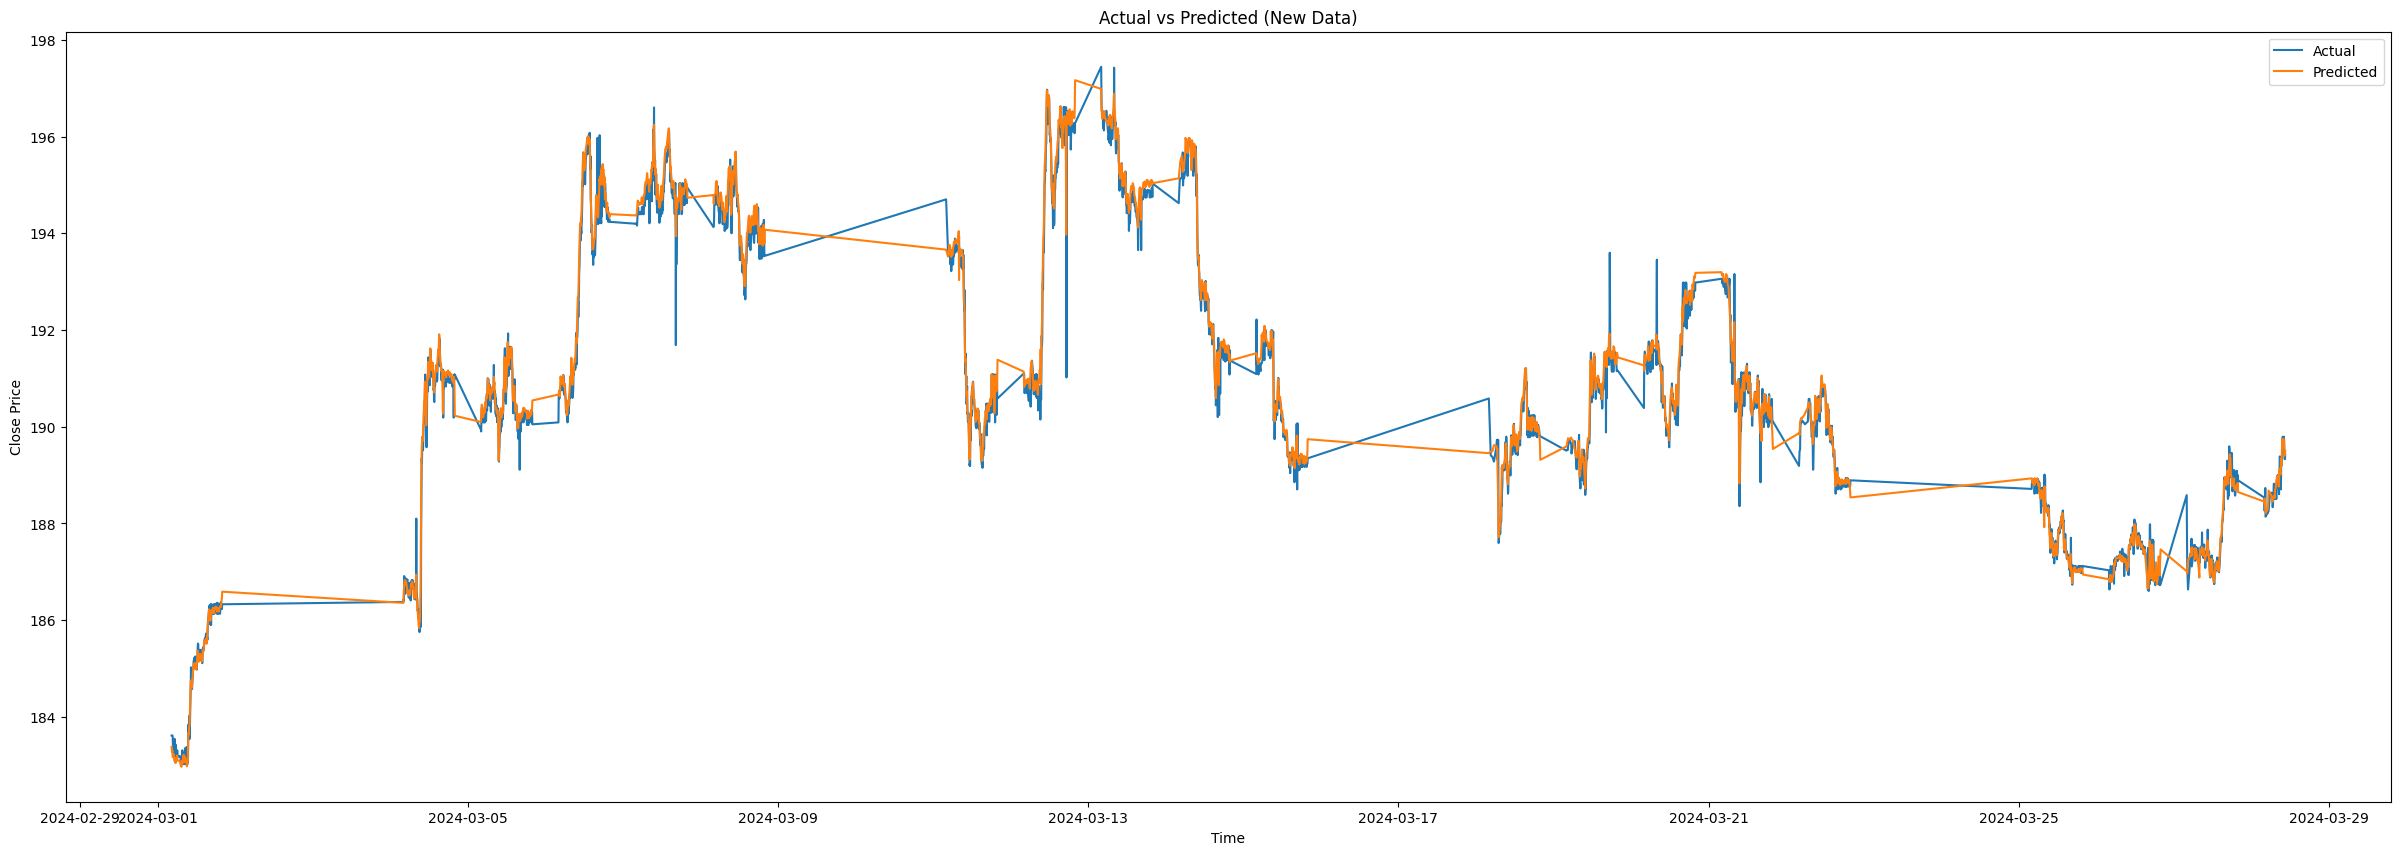

In [53]:
# Plot actual vs predicted for new data
plt.figure(figsize=(30, 10))
plt.plot(new_data['timestamp'][window_size:], y_new_orig, label='Actual')
plt.plot(new_data['timestamp'][window_size:], preds, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted (New Data)')
plt.legend()
plt.show()

101/101 [==============================] - 0s 3ms/step


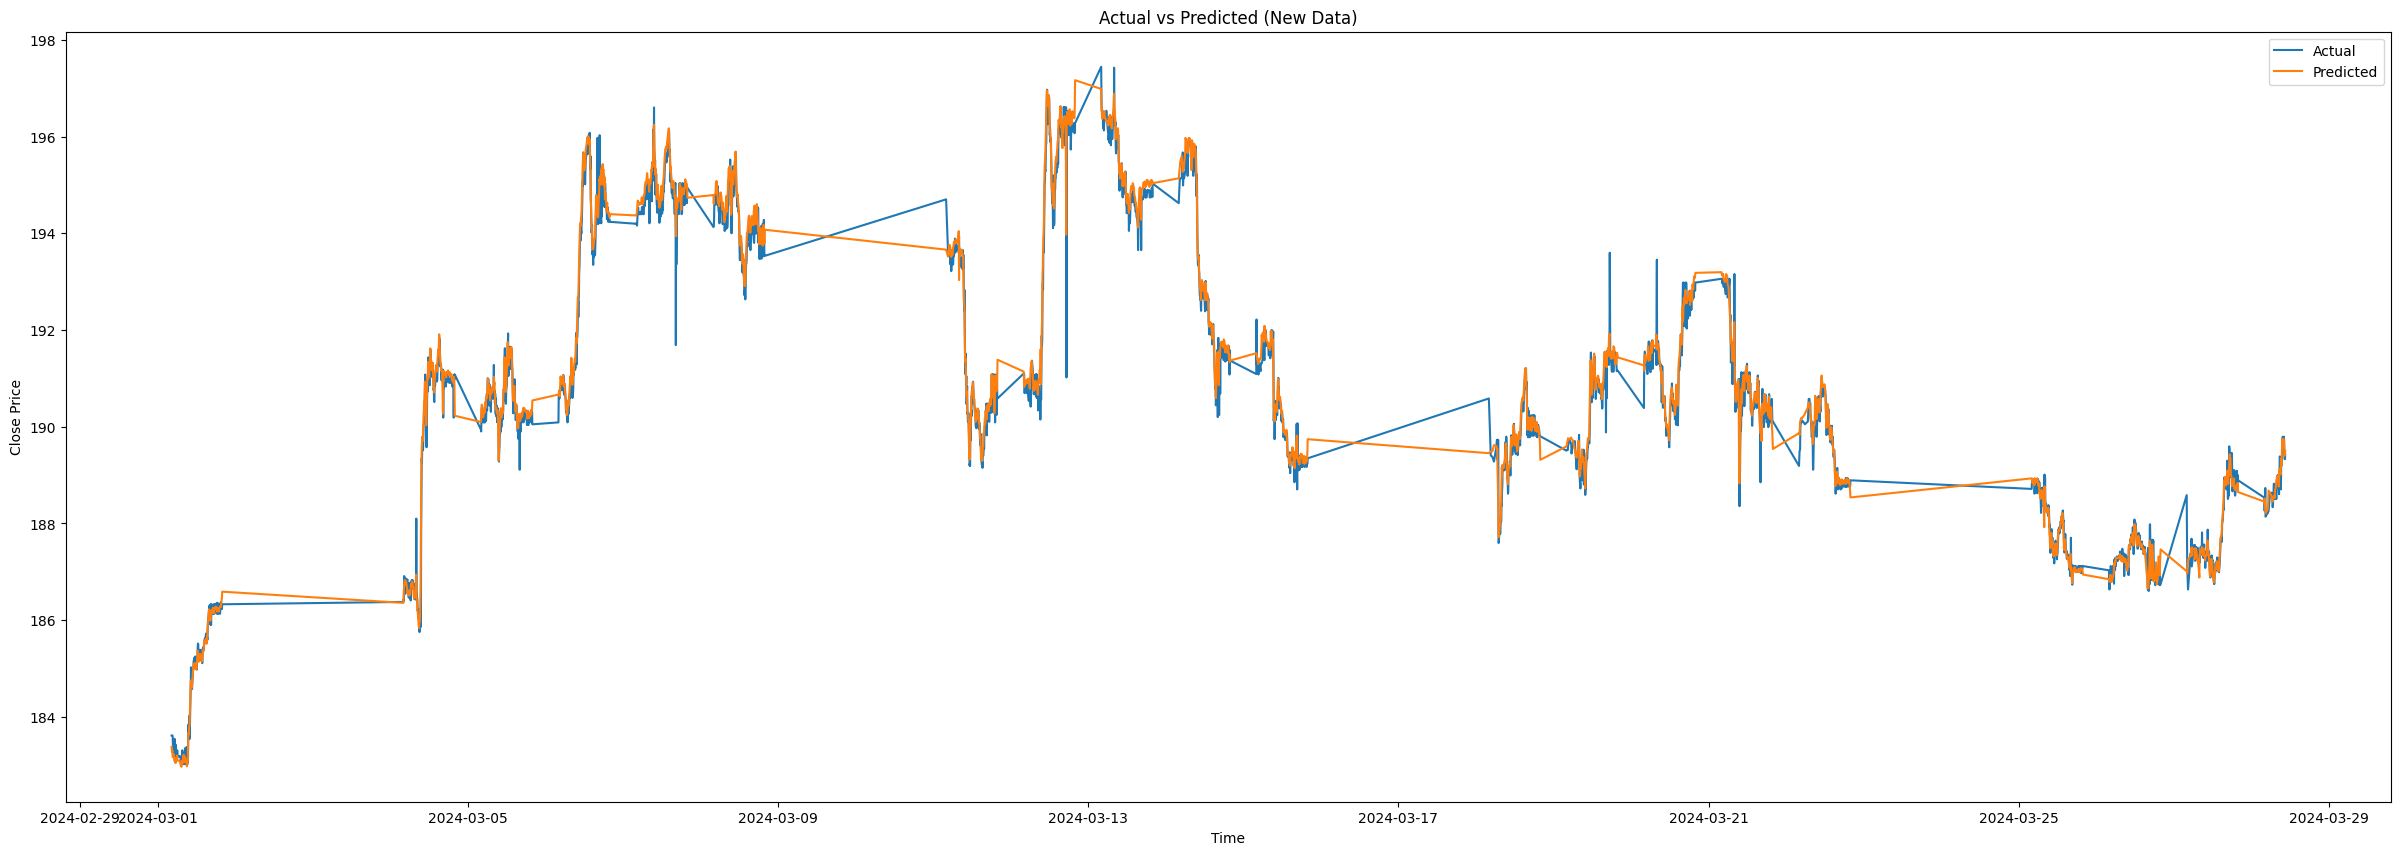

In [51]:
# Function to predict on new data
def predict_new_data(new_data_path, model, scaler, window_size):
    new_data = pd.read_csv(new_data_path)
    new_data['timestamp'] = pd.to_datetime(new_data['timestamp'])

    scaler = MinMaxScaler()
    new_data[['open', 'high', 'low', 'volume']] = scaler.fit_transform(new_data[['open', 'high', 'low', 'volume']])
    new_data['close'] = scaler.fit_transform(new_data[['close']])

    # Create sequences
    X_new, y_new = create_sequence(new_data[['open', 'high', 'low', 'volume']], new_data[['close']], window_size)

    # Predictions
    preds = model.predict(X_new)

    # Inverse scaling
    preds = scaler.inverse_transform(np.concatenate((X_new[:, -1, :-1], preds.reshape(-1, 1)), axis=1))[:, -1]
    y_new_orig = scaler.inverse_transform(np.concatenate((X_new[:, -1, :-1], y_new.reshape(-1, 1)), axis=1))[:, -1]

    # Plot actual vs predicted for new data
    plt.figure(figsize=(30, 10))
    plt.plot(new_data['timestamp'][window_size:], y_new_orig, label='Actual')
    plt.plot(new_data['timestamp'][window_size:], preds, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title('Actual vs Predicted (New Data)')
    plt.legend()
    plt.show()

# Example usage of predict_new_data function
predict_new_data('IBM_MAR_month_5mins_intraday.csv', model, scaler, window_size)